# Mejora del potencial inicial
Aqui he modificado el potencial utilizado en la practica 1, al igual que lo he generalizado mediante la importacion de un script(anidado al final del jupyter por completitud)

In [1]:
# import astropy.units as u
# import numpy as np
# import gala.potential as gp
# from gala.units import galactic
# import matplotlib.pyplot as plt
from constructor import *

In [2]:
oldgalpot = create_gal_potential(total_mass=1e11*u.M_sun, r_s=5*u.kpc)
# Valores L*(M) obtenidos de (Cooray,2008)
# 
newgalpot = create_complex_potential(
    total_mass=1e12*u.M_sun,
    r_s=5*u.kpc,
    dm_fraction=0.78,
    disk_total=0.7,
    bulge_total=0.29,
    nucleus_total=0.01,
    bulge_b=1.2,
    disk_a=10,
    disk_b=0.5,
    nucleus_b=0.4
)

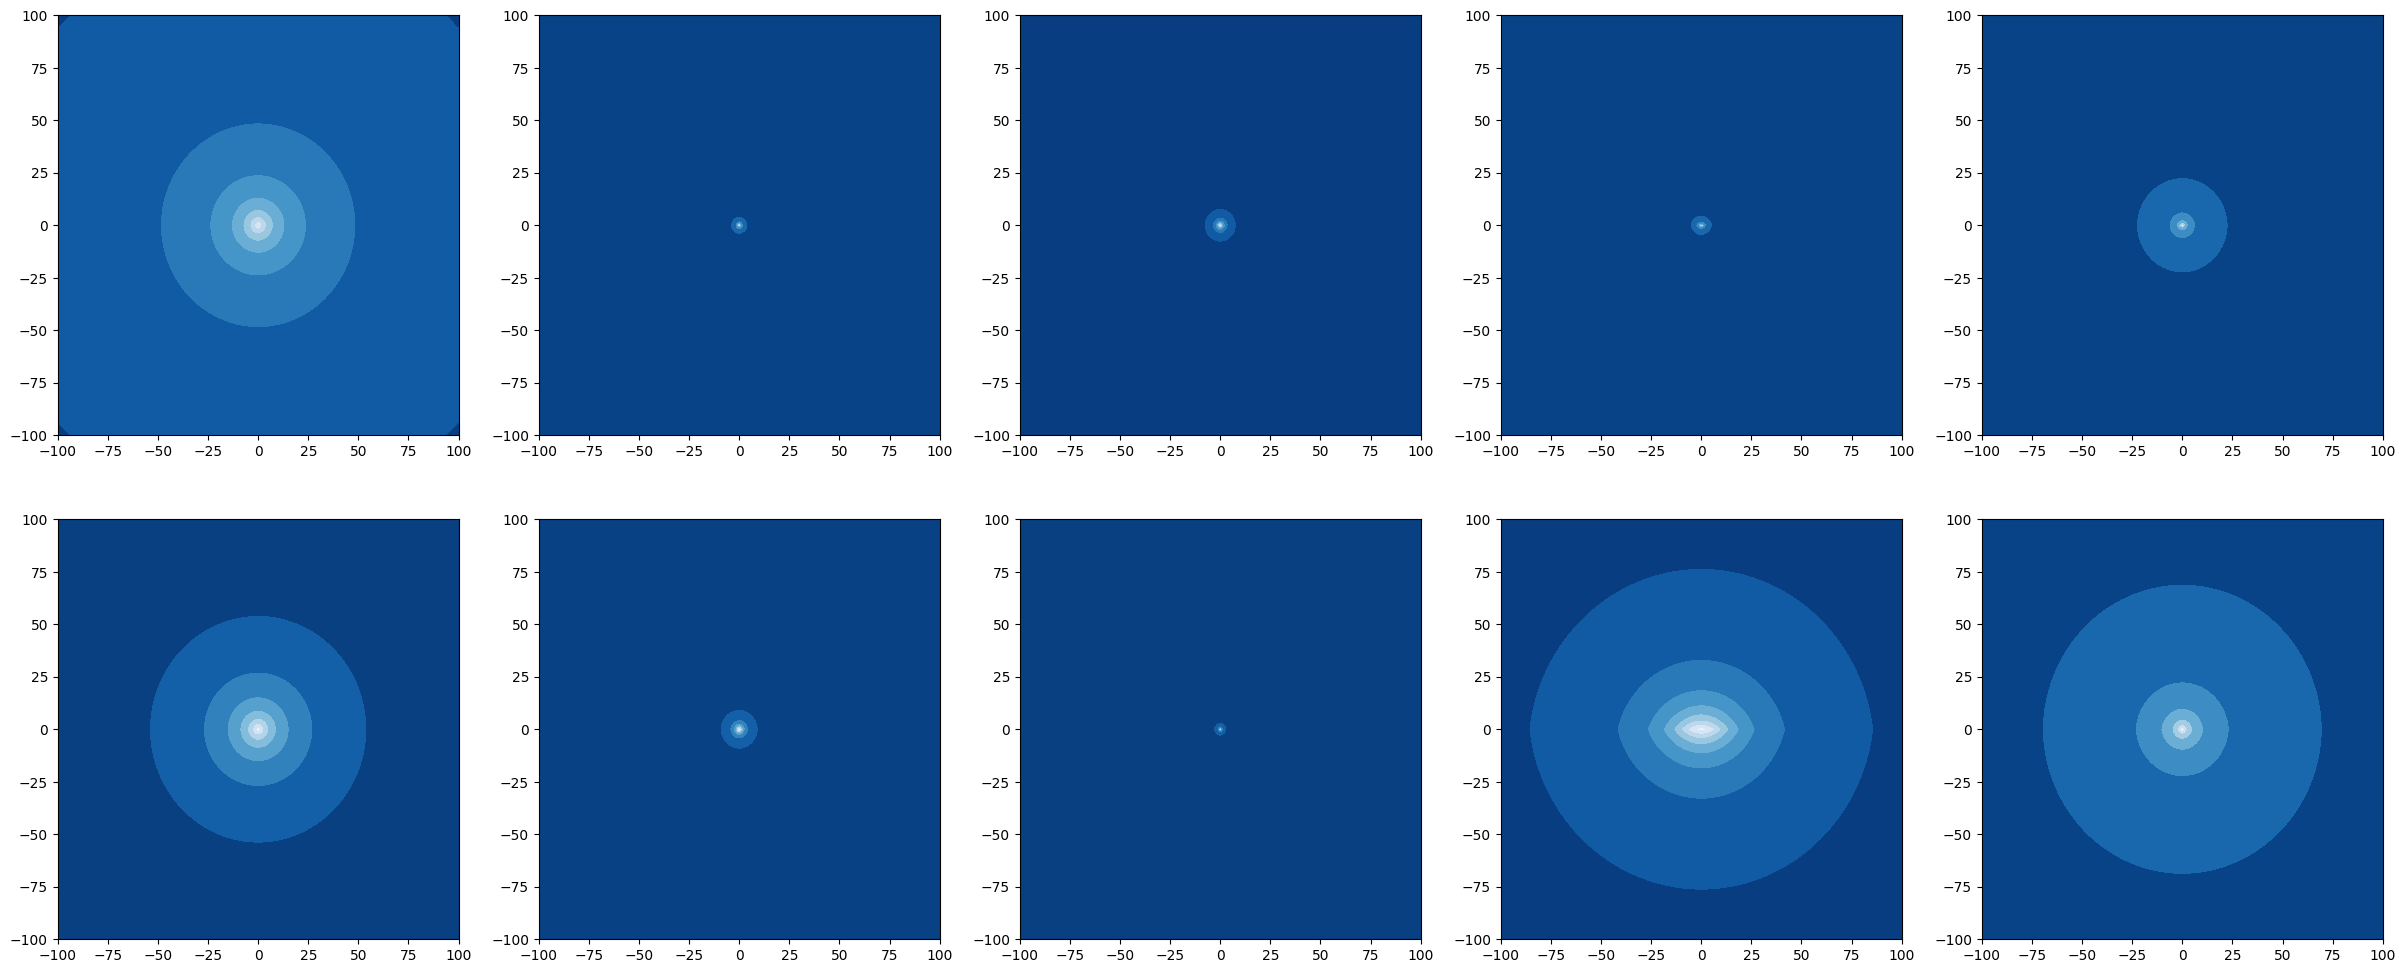

In [3]:
grid = np.linspace(-100,100,1000)
fig, axes = plt.subplots(2,5,figsize=(30,12))

oldgalpot["halo"].plot_contours((grid,0,grid), ax=axes[0,0])
oldgalpot["bulge"].plot_contours((grid,0,grid), ax=axes[0,1])
oldgalpot["nucleus"].plot_contours((grid,0,grid), ax=axes[0,2])
oldgalpot["disk"].plot_contours((grid,0,grid), ax=axes[0,3])
oldgalpot.plot_contours((grid,0,grid), ax=axes[0,4])

newgalpot["halo"].plot_contours((grid,0,grid), ax=axes[1,0])
newgalpot["bulge"].plot_contours((grid,0,grid), ax=axes[1,1])
newgalpot["nucleus"].plot_contours((grid,0,grid), ax=axes[1,2])
newgalpot["disk"].plot_contours((grid,0,grid), ax=axes[1,3])
newgalpot.plot_contours((grid,0,grid), ax=axes[1,4])
plt.show()

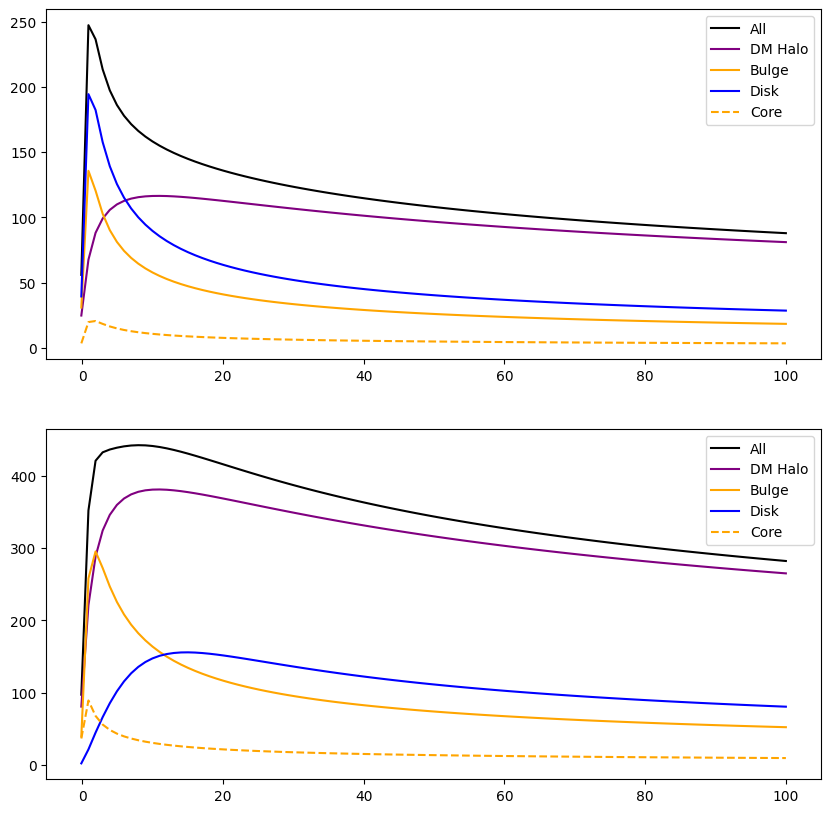

In [4]:
# Curvas de velocidad respectivas ;D
# Es sencillo ver la curva de rotacion de las componentes y del total
grid = np.linspace(-0.1,100,100)
fig, axes = plt.subplots(2,1,figsize=(10,10))
xyz = np.zeros((3,) + grid.shape)
xyz[0] = grid

oldVcirc = {}
oldVcirc["all"] = oldgalpot.circular_velocity(xyz)
oldVcirc["halo"] = oldgalpot['halo'].circular_velocity(xyz)
oldVcirc["bulge"] = oldgalpot['bulge'].circular_velocity(xyz)
oldVcirc["nucleus"] = oldgalpot['disk'].circular_velocity(xyz)
oldVcirc["disk"] = oldgalpot['nucleus'].circular_velocity(xyz)

axes[0].plot(grid,oldVcirc["all"],c='black',label='All')
axes[0].plot(grid,oldVcirc["halo"],c='purple',label='DM Halo')
axes[0].plot(grid,oldVcirc["bulge"],c='orange',label='Bulge')
axes[0].plot(grid,oldVcirc["nucleus"],c='blue',label='Disk')
axes[0].plot(grid,oldVcirc["disk"],c='orange',linestyle='--',label='Core')

axes[0].legend()

newVcirc = {}
newVcirc["all"] = newgalpot.circular_velocity(xyz)
newVcirc["halo"] = newgalpot['halo'].circular_velocity(xyz)
newVcirc["bulge"] = newgalpot['bulge'].circular_velocity(xyz)
newVcirc["nucleus"] = newgalpot['disk'].circular_velocity(xyz)
newVcirc["disk"] = newgalpot['nucleus'].circular_velocity(xyz)

axes[1].plot(grid,newVcirc["all"],c='black',label='All')
axes[1].plot(grid,newVcirc["halo"],c='purple',label='DM Halo')
axes[1].plot(grid,newVcirc["bulge"],c='orange',label='Bulge')
axes[1].plot(grid,newVcirc["nucleus"],c='blue',label='Disk')
axes[1].plot(grid,newVcirc["disk"],c='orange',linestyle='--',label='Core')

axes[1].legend()

# Recreacion de orbitas practica 1 en potencial mejorado
Se utilizan las mismas condiciones iniciales que antes, por completitud se utiliza igualmente el potencial de la practica1, llamado oldgalpot

In [5]:
import gala.dynamics as gd

def orbit_integrate(pot):
    txtsize = 8
    r = [7.5,0,0] * u.kpc
    v = [0, 200, 0] * u.km/u.s
    ics_closed = gd.PhaseSpacePosition(pos=r,vel=v)
    
    r = [100,-300,0] * u.kpc
    v = [-70, 260, 0] * u.km/u.s
    ics_hyperbolic = gd.PhaseSpacePosition(pos=r,vel=v)
    
    fig,axes = plt.subplots(2,4,figsize=(20,10))
    
    sumpot = gp.CCompositePotential()
    i = 0
    grid_closed = np.linspace(-30,30,1000)
    grid_hypebolic = np.linspace(-150,150,1000)
    components_str = ''
    for key in pot.keys():
        sumpot[key] = pot[key]
        sumpot.plot_contours(grid=(grid_closed,grid_closed,0), ax=axes[0,i])
        sumpot.plot_contours(grid=(grid_hypebolic,grid_hypebolic,0), ax=axes[1,i])
        closed_orbit = gp.Hamiltonian(sumpot).integrate_orbit(ics_closed, dt=0.6, n_steps=1e4)
        closed_orbit.plot(components=['x','y'], axes=[axes[0,i]], color='red')
        hyperbolic_orbit = gp.Hamiltonian(sumpot).integrate_orbit(ics_hyperbolic, dt=1., n_steps=6e3)
        hyperbolic_orbit.plot(components=['x','y'], axes=[axes[1,i]], color='red')
        components_str += key + '|'
        axes[0,i].set_title(f'{components_str}')
        axes[0,i].set_xlim(-30,30)
        axes[0,i].set_ylim(-30,30)
        axes[1,i].set_xlim(-100,100)
        axes[1,i].set_ylim(-100,100)
        # texto con apocentros y datos
        closed_energy = np.round(ics_closed.energy(sumpot).to(u.km**2/u.s**2)[0],2)
        closed_apocenter = np.round(closed_orbit.apocenter(),2)
        closed_pericenter = np.round(closed_orbit.pericenter(),2)
        closed_eccentricity = np.round(closed_orbit.eccentricity(),2)
        hyperbolic_energy = np.round(ics_hyperbolic.energy(sumpot).to(u.km**2/u.s**2)[0],2)
        hyperbolic_apocenter = np.round(hyperbolic_orbit.apocenter(),2)
        hyperbolic_pericenter = np.round(hyperbolic_orbit.pericenter(),2)
        hyperbolic_eccentricity = np.round(hyperbolic_orbit.eccentricity(),2)
        axes[0,i].text(0.01,0.95,f'E = {closed_energy}',transform=axes[0,i].transAxes,size=txtsize,c='white')
        axes[0,i].text(0.01,0.025,f'Apocenter = {closed_apocenter}',transform=axes[0,i].transAxes,size=txtsize,c='white')
        axes[0,i].text(0.01,0.075,f'Pericenter = {closed_pericenter}',transform=axes[0,i].transAxes,size=txtsize,c='white')
        axes[0,i].text(0.01,0.125,f'Ecentricity = {closed_eccentricity}',transform=axes[0,i].transAxes,size=txtsize,c='white')
        axes[1,i].text(0.01,0.95,f'E = {hyperbolic_energy}',transform=axes[1,i].transAxes,size=txtsize,c='white')
        axes[1,i].text(0.01,0.025,f'Apocenter = {hyperbolic_apocenter}',transform=axes[1,i].transAxes,size=txtsize,c='white')
        axes[1,i].text(0.01,0.075,f'Pericenter = {hyperbolic_pericenter}',transform=axes[1,i].transAxes,size=txtsize,c='white')
        axes[1,i].text(0.01,0.125,f'Eccentricity = {hyperbolic_eccentricity}',transform=axes[1,i].transAxes,size=txtsize,c='white')
        # Podemos saber si seleccionamos dt corecto si vemos que la energia se conserva
        print('-'*84)
        print(components_str)
        print('-'*84)
        print('Std deviation of Energy')
        print(np.std(closed_orbit.energy()),'\n',np.std(hyperbolic_orbit.energy()))
        print('Std deviation of Ang.Mom')
        # Y que tambien el momentum angular lo hace
        print(np.std(closed_orbit.angular_momentum()[2,:]),'\n',np.std(hyperbolic_orbit.angular_momentum()[2,:]))
        i += 1
    return(fig,axes)

/home/marcoritou/anaconda3/envs/galatopicos/lib/python3.12/site-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/marcoritou/anaconda3/envs/galatopicos/lib/python3.12/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


------------------------------------------------------------------------------------
halo|
------------------------------------------------------------------------------------
Std deviation of Energy
5.282064624981633e-08 kpc2 / Myr2 
 5.1652334433290194e-08 kpc2 / Myr2
Std deviation of Ang.Mom
4.0894219647285164e-15 kpc2 / Myr 
 1.6883644340429877e-13 kpc2 / Myr
------------------------------------------------------------------------------------
halo|bulge|
------------------------------------------------------------------------------------
Std deviation of Energy
7.739724675770838e-08 kpc2 / Myr2 
 6.368840922873448e-08 kpc2 / Myr2
Std deviation of Ang.Mom
6.6392235314686294e-15 kpc2 / Myr 
 3.20919034251333e-13 kpc2 / Myr
------------------------------------------------------------------------------------
halo|bulge|disk|
------------------------------------------------------------------------------------
Std deviation of Energy
1.306619770051138e-07 kpc2 / Myr2 
 9.990359975750819e

(<Figure size 2000x1000 with 8 Axes>,
 array([[<Axes: title={'center': 'halo|'}, xlabel='$x$ [$\\mathrm{kpc}$]', ylabel='$y$ [$\\mathrm{kpc}$]'>,
         <Axes: title={'center': 'halo|bulge|'}, xlabel='$x$ [$\\mathrm{kpc}$]', ylabel='$y$ [$\\mathrm{kpc}$]'>,
         <Axes: title={'center': 'halo|bulge|disk|'}, xlabel='$x$ [$\\mathrm{kpc}$]', ylabel='$y$ [$\\mathrm{kpc}$]'>,
         <Axes: title={'center': 'halo|bulge|disk|nucleus|'}, xlabel='$x$ [$\\mathrm{kpc}$]', ylabel='$y$ [$\\mathrm{kpc}$]'>],
        [<Axes: xlabel='$x$ [$\\mathrm{kpc}$]', ylabel='$y$ [$\\mathrm{kpc}$]'>,
         <Axes: xlabel='$x$ [$\\mathrm{kpc}$]', ylabel='$y$ [$\\mathrm{kpc}$]'>,
         <Axes: xlabel='$x$ [$\\mathrm{kpc}$]', ylabel='$y$ [$\\mathrm{kpc}$]'>,
         <Axes: xlabel='$x$ [$\\mathrm{kpc}$]', ylabel='$y$ [$\\mathrm{kpc}$]'>]],
       dtype=object))

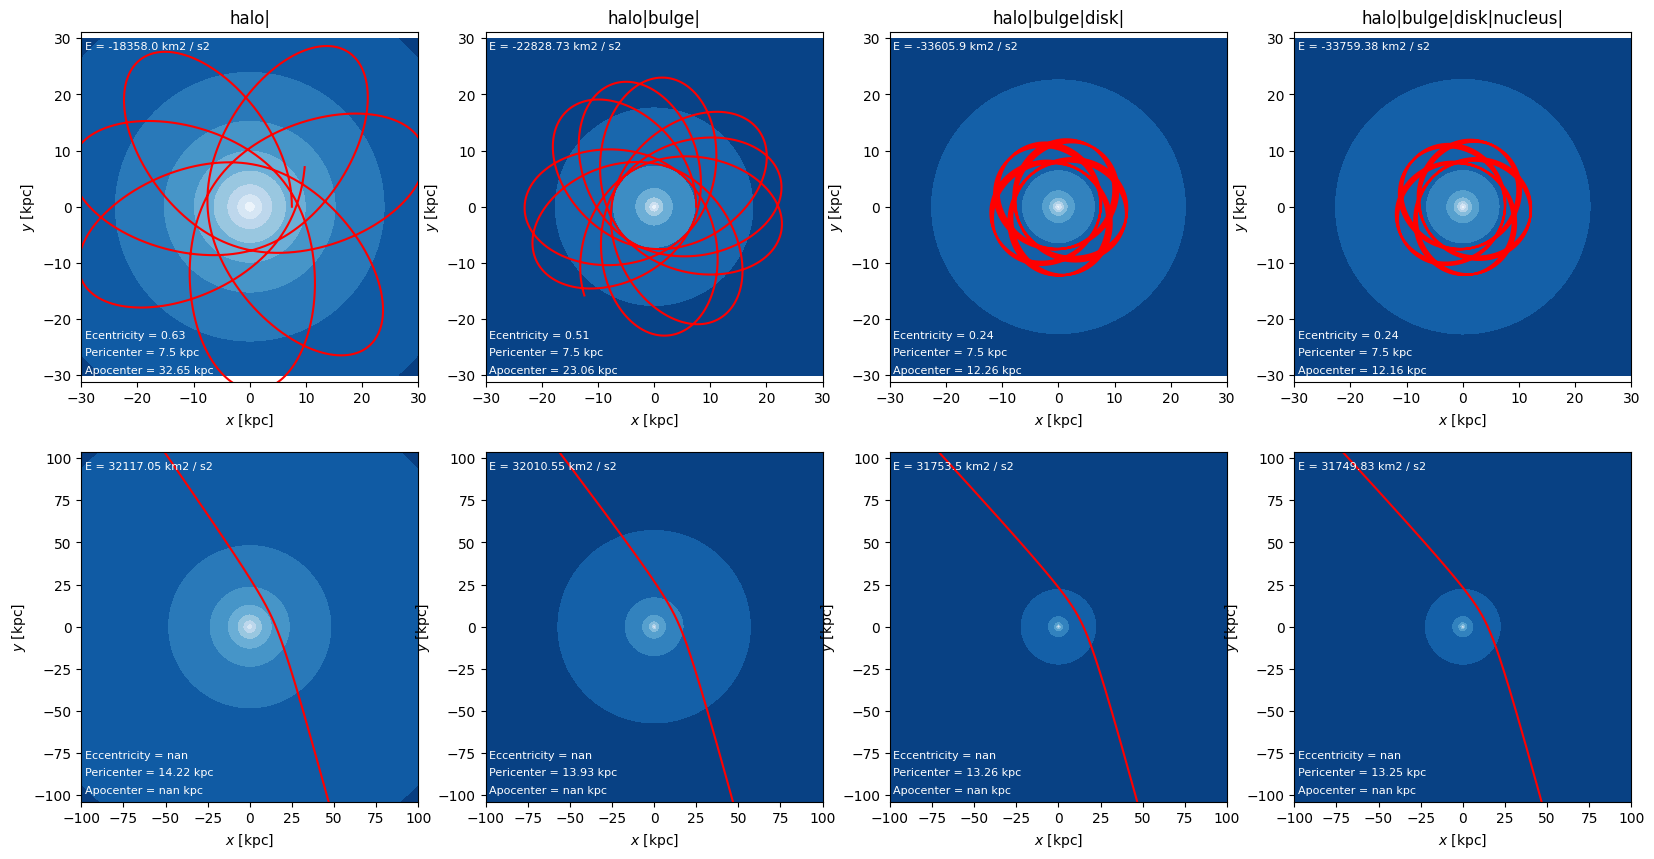

In [6]:
orbit_integrate(oldgalpot)

------------------------------------------------------------------------------------
halo|
------------------------------------------------------------------------------------
Std deviation of Energy
2.836599698070888e-05 kpc2 / Myr2 
 1.0284121916748385e-05 kpc2 / Myr2
Std deviation of Ang.Mom
4.131331762910151e-15 kpc2 / Myr 
 7.848084455925017e-14 kpc2 / Myr
------------------------------------------------------------------------------------
halo|bulge|
------------------------------------------------------------------------------------
Std deviation of Energy
0.00011468422063876896 kpc2 / Myr2 
 1.6276716278089295e-05 kpc2 / Myr2
Std deviation of Ang.Mom
6.2872043623462105e-15 kpc2 / Myr 
 1.605188472161369e-13 kpc2 / Myr
------------------------------------------------------------------------------------
halo|bulge|disk|
------------------------------------------------------------------------------------
Std deviation of Energy
0.00013196197532522818 kpc2 / Myr2 
 2.09097981507707

(<Figure size 2000x1000 with 8 Axes>,
 array([[<Axes: title={'center': 'halo|'}, xlabel='$x$ [$\\mathrm{kpc}$]', ylabel='$y$ [$\\mathrm{kpc}$]'>,
         <Axes: title={'center': 'halo|bulge|'}, xlabel='$x$ [$\\mathrm{kpc}$]', ylabel='$y$ [$\\mathrm{kpc}$]'>,
         <Axes: title={'center': 'halo|bulge|disk|'}, xlabel='$x$ [$\\mathrm{kpc}$]', ylabel='$y$ [$\\mathrm{kpc}$]'>,
         <Axes: title={'center': 'halo|bulge|disk|nucleus|'}, xlabel='$x$ [$\\mathrm{kpc}$]', ylabel='$y$ [$\\mathrm{kpc}$]'>],
        [<Axes: xlabel='$x$ [$\\mathrm{kpc}$]', ylabel='$y$ [$\\mathrm{kpc}$]'>,
         <Axes: xlabel='$x$ [$\\mathrm{kpc}$]', ylabel='$y$ [$\\mathrm{kpc}$]'>,
         <Axes: xlabel='$x$ [$\\mathrm{kpc}$]', ylabel='$y$ [$\\mathrm{kpc}$]'>,
         <Axes: xlabel='$x$ [$\\mathrm{kpc}$]', ylabel='$y$ [$\\mathrm{kpc}$]'>]],
       dtype=object))

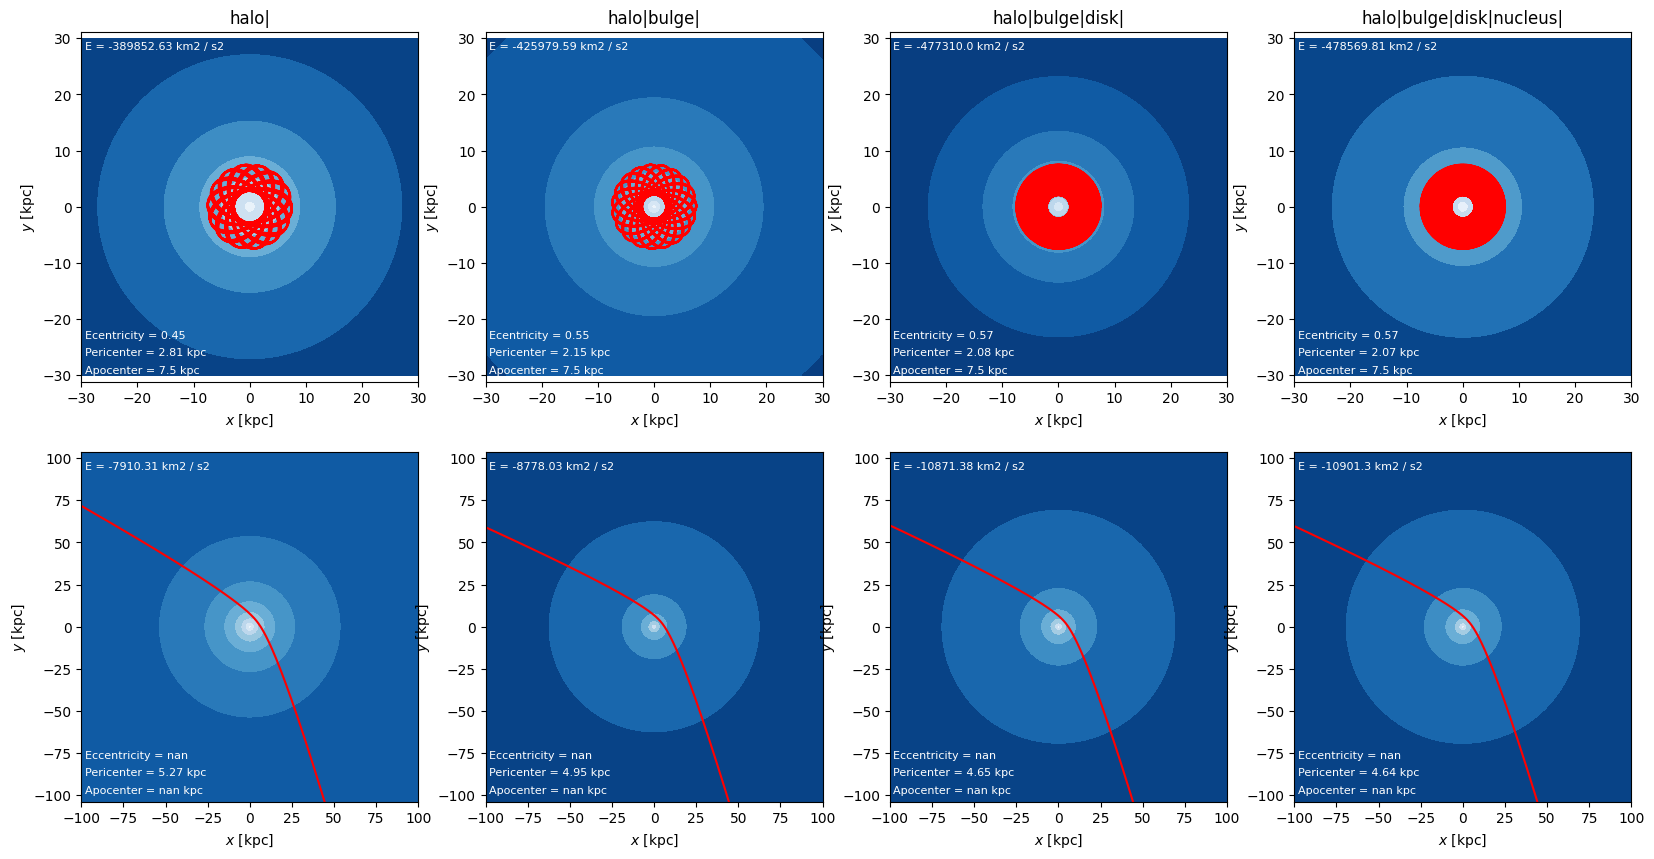

In [7]:
orbit_integrate(newgalpot)

# 1) Evolucion temporal de parametros de las orbitas
Aqui son mostrados los parametros con respecto al tiempo de las orbitas de manera secuencial en los potenciales mejorados y antiguos
- Energia($E_T$) vs t
- Momento angular total($L_T$) vs t
- Componentes del momento angular($L_x$,$L_y$,$L_z$) vs t
- Eccentricidad($e$) vs t 

In [8]:
def parametersvstime(pot,parameter,ics_closed):
    fig, axes = plt.subplots(1,4,figsize=(24,6))
    sumpot = gp.CCompositePotential()
    i = 0
    grid_closed = np.linspace(-30,30,1000)
    grid_hypebolic = np.linspace(-150,150,1000)
    components_str = ""
    for key in pot.keys():
        sumpot[key] = pot[key]
        closed_orbit = gp.Hamiltonian(sumpot).integrate_orbit(ics_closed, dt=0.4, n_steps=1e4)
        components_str += key + '+'
        axes[i].set_title(f'{components_str}')
        cparameters = {}
        cparameters["energy"] = closed_orbit.energy()
        cparameters["L_x"] = closed_orbit.angular_momentum()[0,:]
        cparameters["L_y"] = closed_orbit.angular_momentum()[1,:]
        cparameters["L_z"] = closed_orbit.angular_momentum()[2,:]
        cparameters["L_T"] = np.sqrt(cparameters["L_x"]**2 + cparameters["L_y"]**2 + cparameters["L_z"]**2)
        if parameter in ["energy","L_T"]:
            x = closed_orbit.t
            y = cparameters[parameter]
            axes[i].plot(x,y)
        if parameter in ["e"]:
            apo = closed_orbit.apocenter(func=None,return_times=True)[0][:]
            apo_times = closed_orbit.apocenter(func=None,return_times=True)[1][:]
            per = closed_orbit.pericenter(func=None,return_times=True)[0][:]
            per_times = closed_orbit.pericenter(func=None,return_times=True)[1][:]
            try:
                cparameters["e"] = (apo-per)/(apo+per)
            except:
                cparameters["e"] = (apo-per[1:])/(apo+per[1:])
            x = apo_times
            y = cparameters[parameter]
            axes[i].plot(x,y)
        if parameter in ["L"]:
            x = closed_orbit.t
            for name in ["L_x","L_y","L_z"]:
                y = cparameters[name]
                axes[i].plot(x,y, label=f"{name}")
                axes[i].legend(fontsize=10)
        i += 1
    fig.suptitle(f"{parameter} vs t",size=16)
    return(fig,axes)

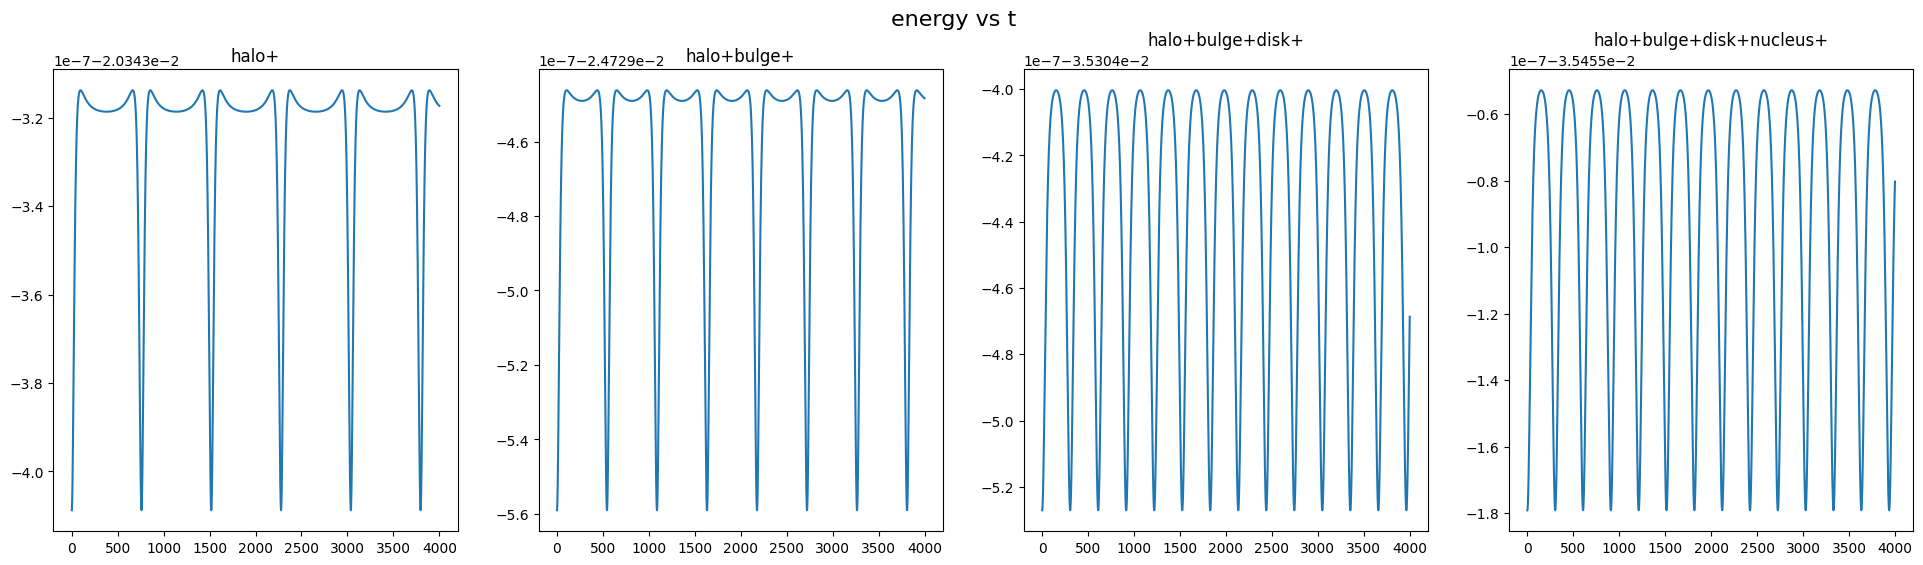

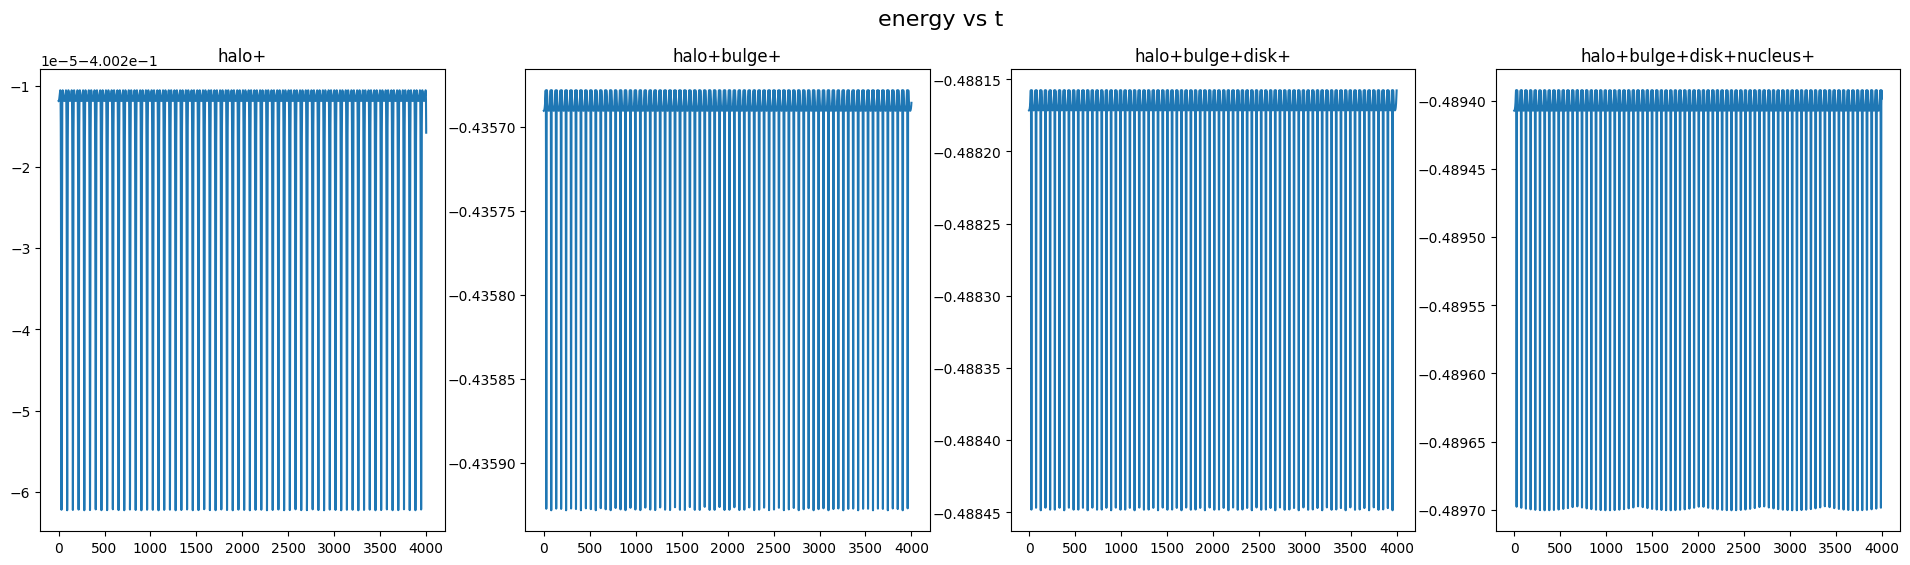

In [9]:
# Orbitas usadas initial
r = [8,0,0] * u.kpc
v = [0, 190, 0] * u.km/u.s
ics_closed = gd.PhaseSpacePosition(pos=r,vel=v)

r = [100,-300,0] * u.kpc
v = [-70, 260, 0] * u.km/u.s
ics_hyperbolic = gd.PhaseSpacePosition(pos=r,vel=v)

fig,axes = parametersvstime(oldgalpot,"energy",ics_closed)
fig,axes = parametersvstime(newgalpot,"energy",ics_closed)
plt.show()

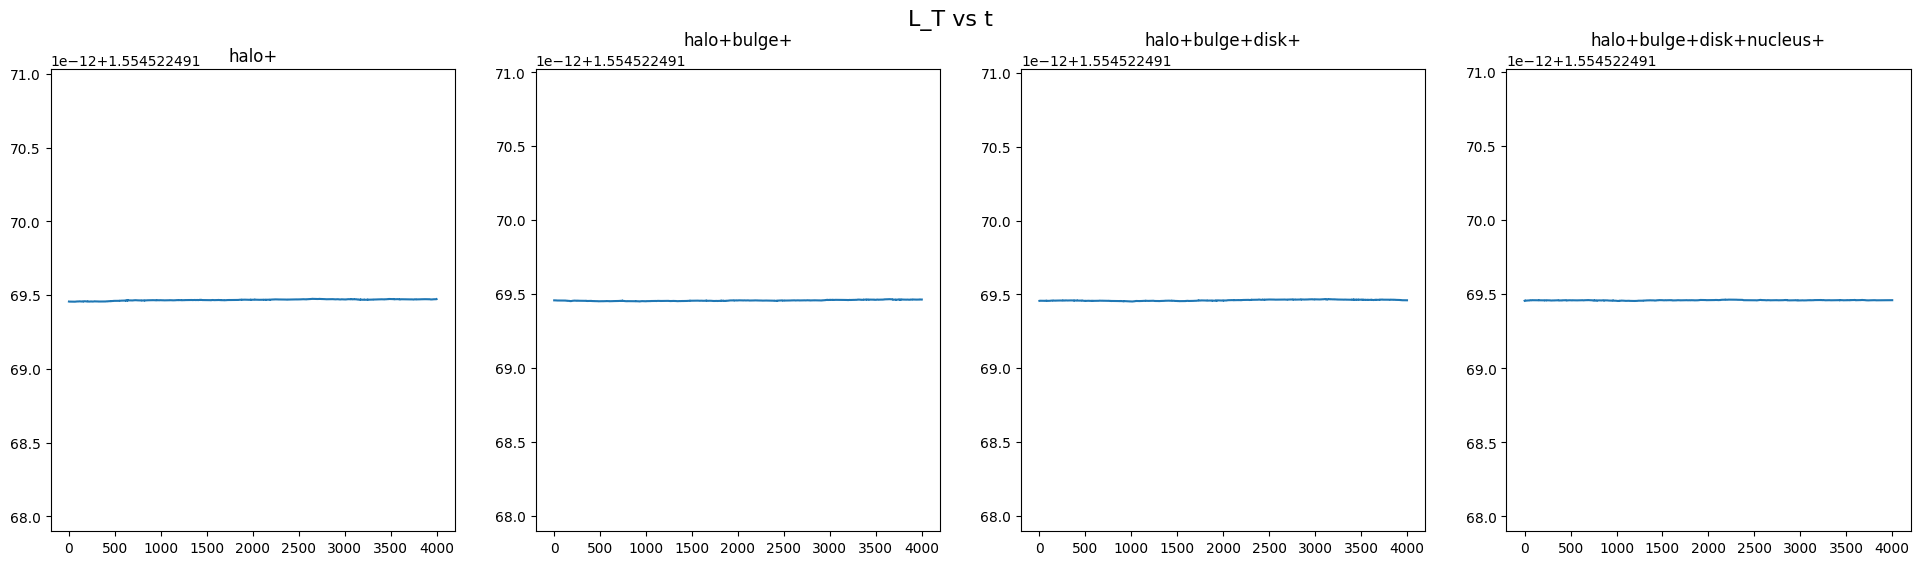

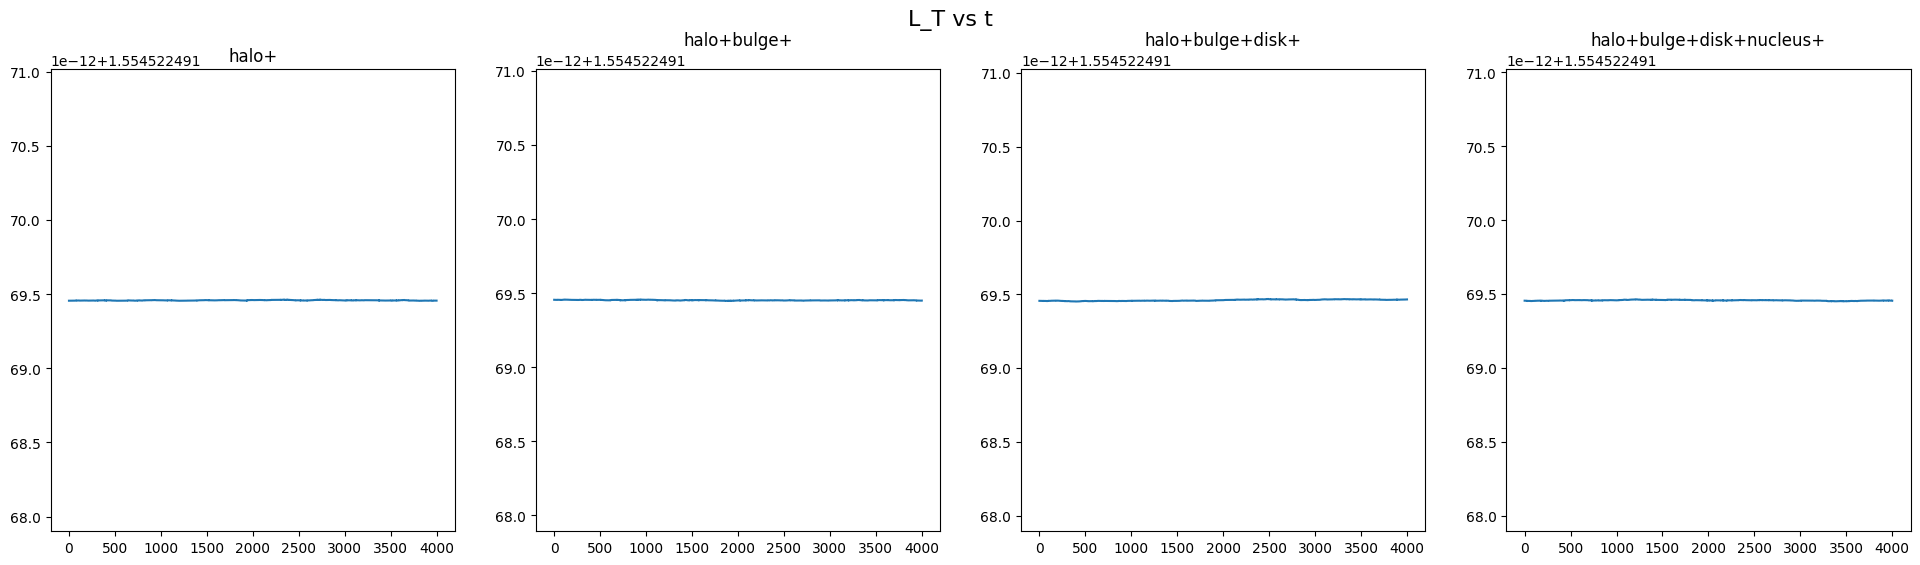

In [10]:
fig,axes = parametersvstime(oldgalpot,"L_T",ics_closed)
fig,axes = parametersvstime(newgalpot,"L_T",ics_closed)
plt.show()

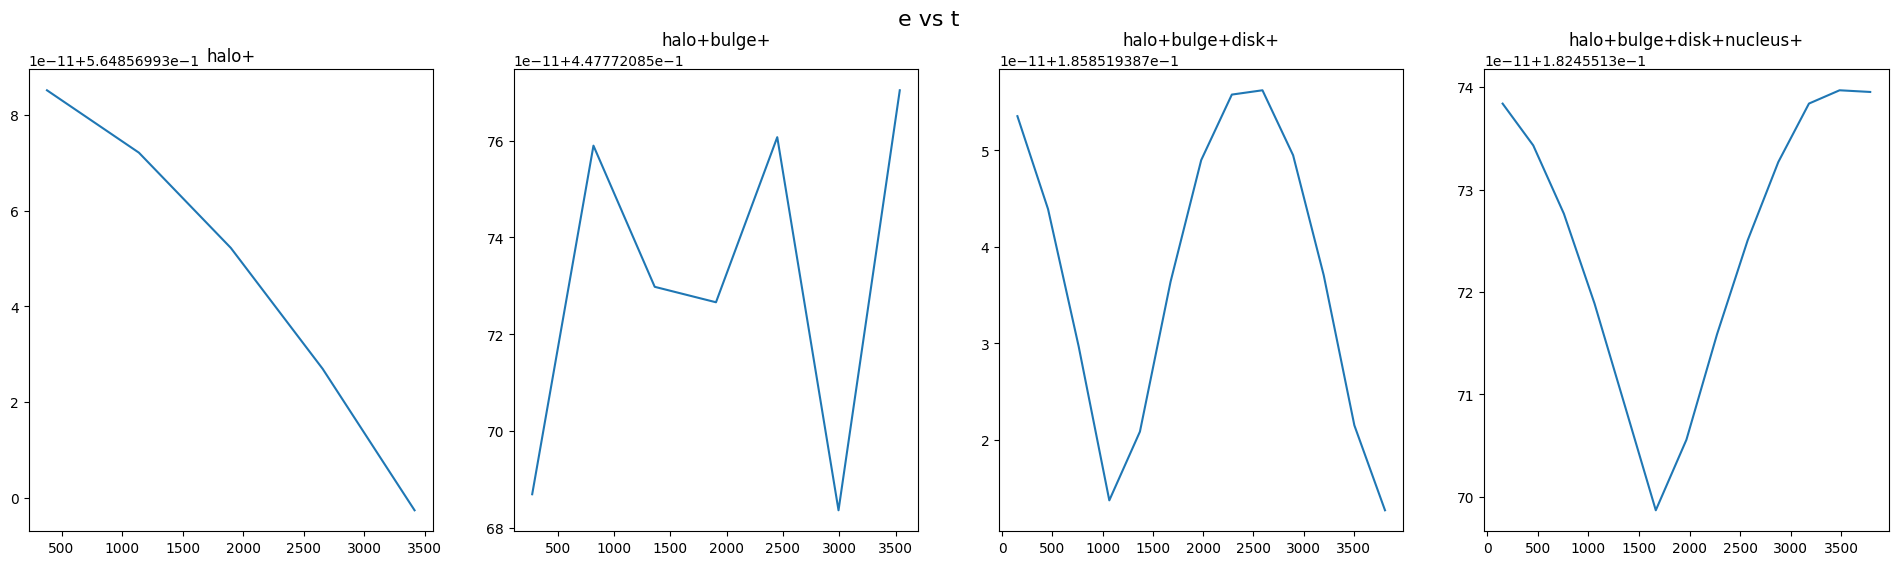

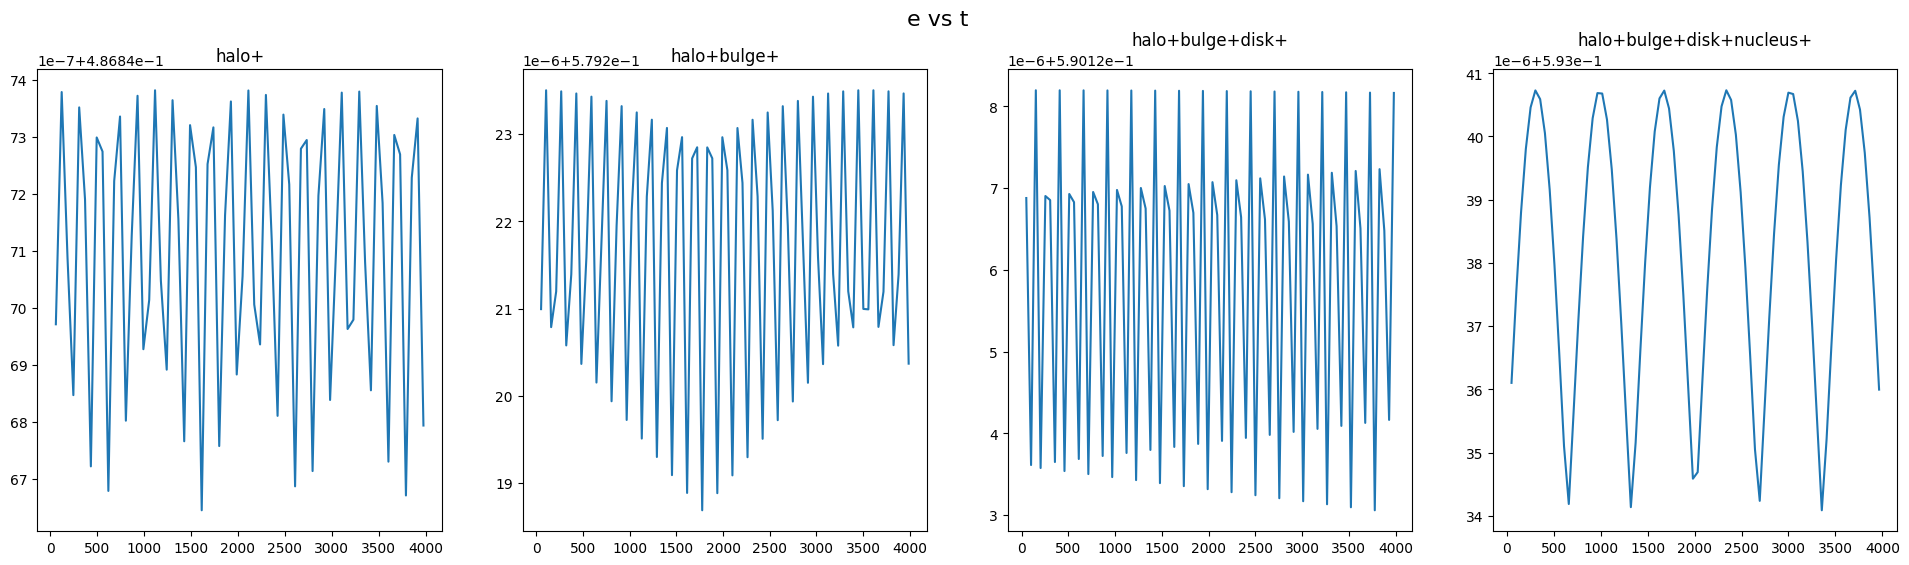

In [11]:
fig,axes = parametersvstime(oldgalpot,"e",ics_closed)
fig,axes = parametersvstime(newgalpot,"e",ics_closed)
plt.show()

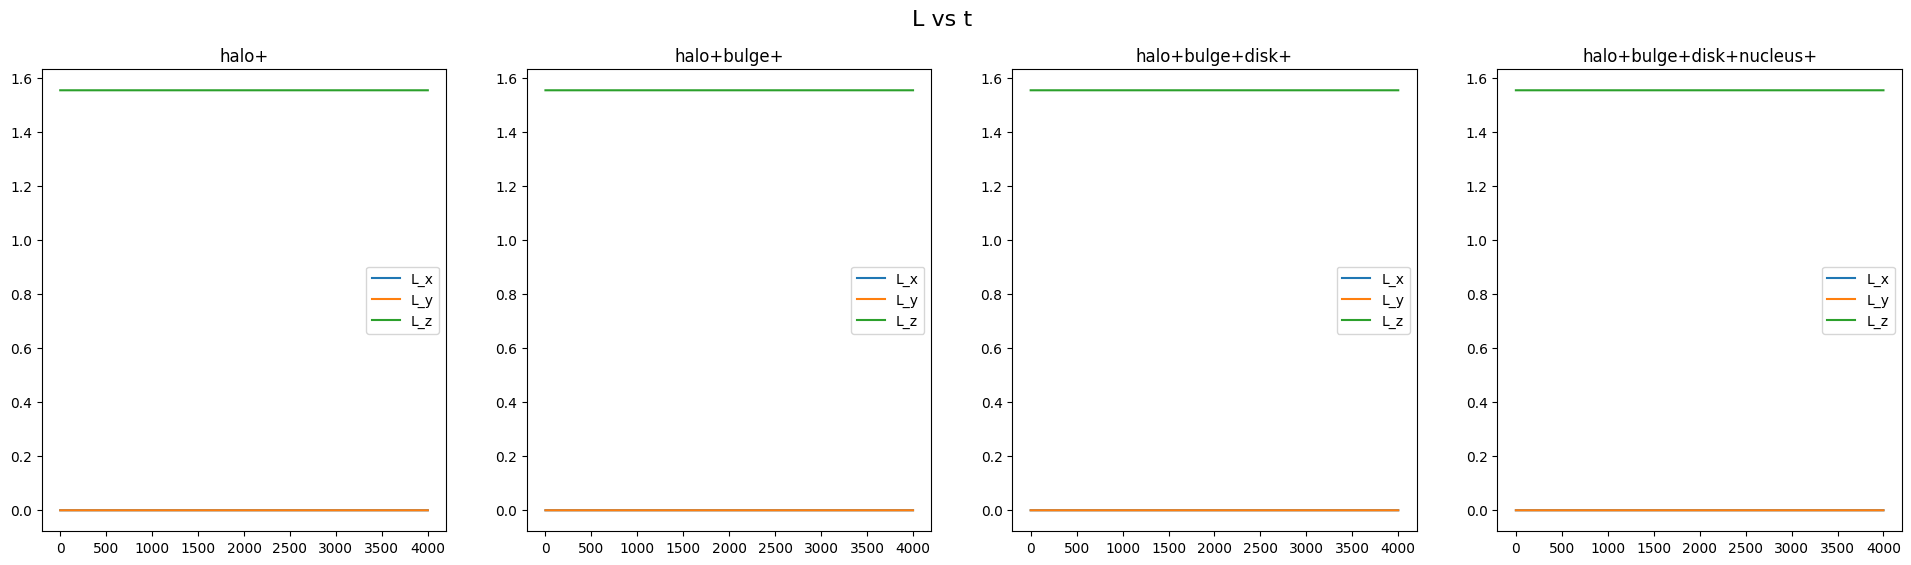

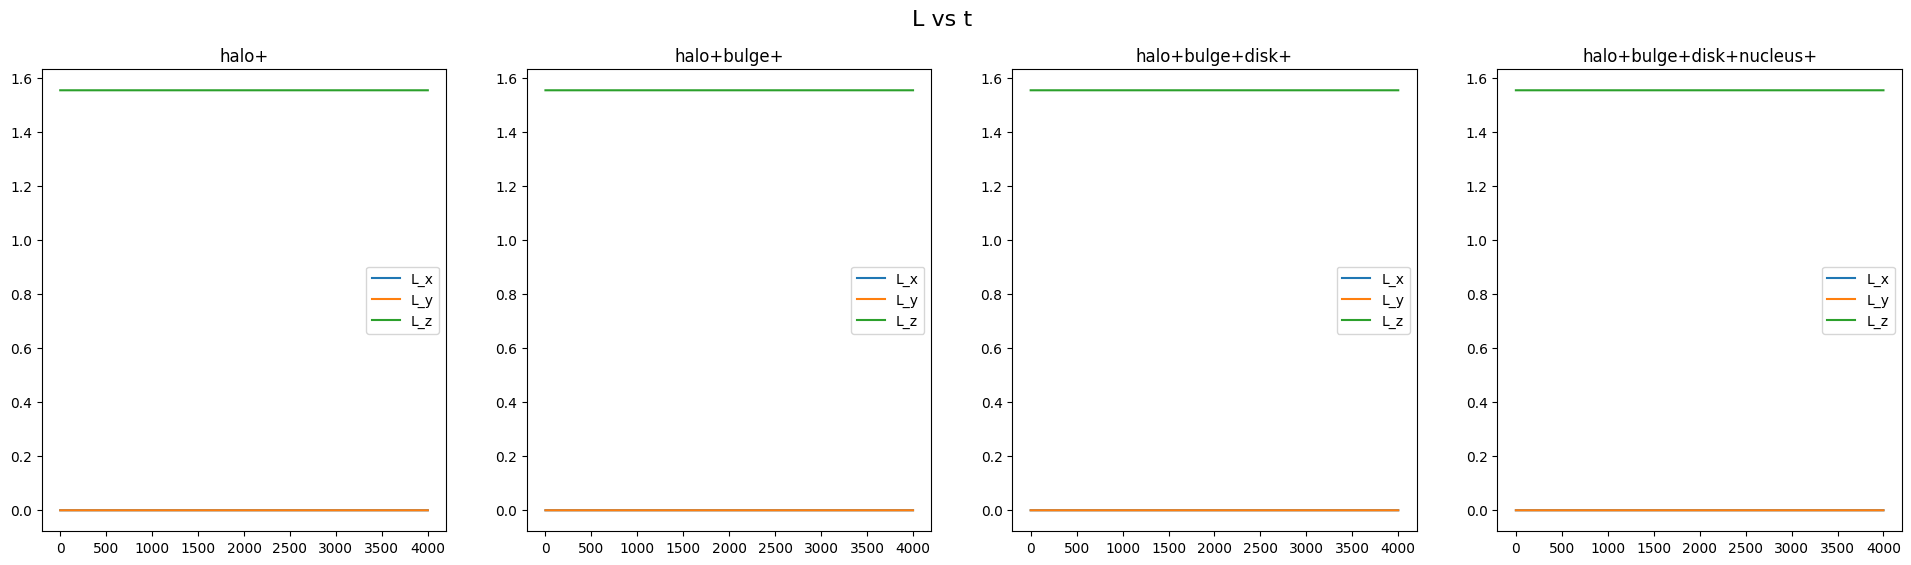

In [12]:
fig,axes = parametersvstime(oldgalpot,"L",ics_closed)
fig,axes = parametersvstime(newgalpot,"L",ics_closed)
plt.show()

## 1.1) Discusion
EL observar estos valores de manera temporal permite saber que tan buena fue la integracion, ya que para valores demasiado grandes de "dt" la integracion es incorrecta y ocurren situaciones donde ni la energia ni el momento angular se conservan. Sin embargo esto sera solo cierto si el potencial que se esta considerando no cambia con respecto al tiempo, que en el caso particular presentado es asi, todos los potenciales son estaticos temporalmente.


Viendo los casos por orden:
La energia vs el tiempo, si bien puede aparentar que esta cambiando, las variaciones no superan un valor de 0.0003, por ende es practicamente constante, aun asi si se desea se puede reducir dt, para mejorar aun mas la precision, sin embargo ya es suficientemente preciso.

El momentum angular total vs el tiempo, se conserva completamente como es esperado, y es practicamente constante en toda la integración.

La excentricidad vs el tiempo, es practicamente constante nuevamente, esto tiene sentido al considerar que la orbita que posee el cuerpo no es particularmente caotica, y se mantiene en forma, solo rotando la orbita en si como un todo.

Luego si vemos las componentes del momento angular tiene sentido que apunte directamente en z, ya que la orbita que dibuja el objeto es bidimensional

# 2) Superficies de poincare de las orbitas
Se realizan los cortes tanto en las orbitas en los potenciales antiguos como nuevos

In [13]:
def poincare_surface(pot, ics,
                     ax=None, xyz=["x","y","v_x"],
                     dt=0.1*u.Myr, t_final=1000*u.Myr
                    ):
    """
    Generates a 3d figure of the poincare surface, ax must have a 3d property
    """
    orbit = gp.Hamiltonian(pot).integrate_orbit(ics, dt=dt, n_steps=t_final/dt)
    orbit.plot_3d(components=xyz, color='red', ax=ax)
    return(orbit)

def multi_poincare(pot,ics,
                   xyz1=["x","y","v_x"],xyz2=["x","z","v_x"],xyz3=["y","z","v_y"],
                   t_final=4000*u.Myr
                  ):
    """
    Makes 3 poincare 3d surfaces, according to xyz1,xyz2 and xyz3
    """
    fig,axes = plt.subplots(1,3,figsize=(9,3), subplot_kw={'projection': "3d"})
    i = 0
    xyz=[xyz1,xyz2,xyz3]
    for ax in axes:
        poincare_surface(pot,ics,t_final=t_final,xyz=xyz[i], ax=ax)
        i+=1
    return(fig,axes)

def poincare_slice(pot,ics,
                   hor="x",ver="v_x", cut="y",
                   proj_plane=0,
                   dproj=1e-1, ax=None,
                   dt=0.1*u.Myr, t_final=1000*u.Myr
                  ):
    """
    Makes a poincare slice, by limiting the slice around a point according to a dproj. that cuts the plane "cut"
    """
    orbit = gp.Hamiltonian(pot).integrate_orbit(ics, dt=dt, n_steps=t_final/dt)
    orbit_data = {}
    orbit_data["x"] = orbit.pos.x
    orbit_data["y"] = orbit.pos.y
    orbit_data["z"] = orbit.pos.z
    orbit_data["v_x"] = orbit.vel.d_x
    orbit_data["v_y"] = orbit.vel.d_y
    orbit_data["v_z"] = orbit.vel.d_z
    x,y = orbit_data[hor],orbit_data[ver]
    z = orbit_data[cut]
    filtre = np.where((z < (proj_plane + dproj) * z.unit) & (z > (proj_plane - dproj) * z.unit))
    x,y = x[filtre],y[filtre]
    return(x,y)

### Superficies de poincare en potencial completo

In [14]:
%matplotlib widget

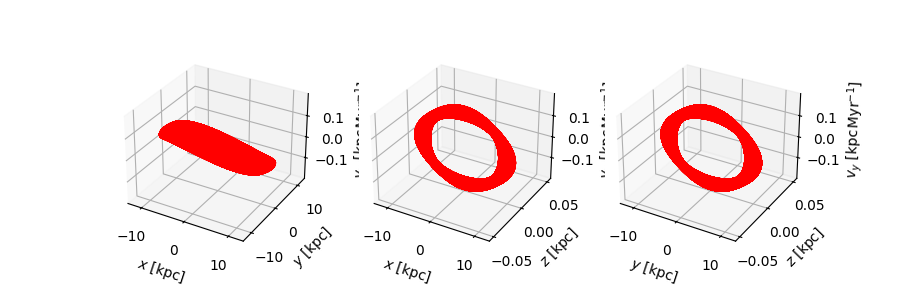

In [15]:
fig,axes = multi_poincare(oldgalpot,ics_closed,t_final=1e5*u.Myr)

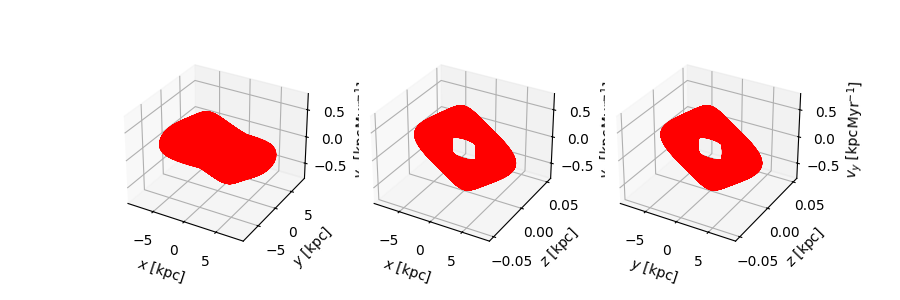

In [16]:
fig,axes = multi_poincare(newgalpot,ics_closed,t_final=1e4*u.Myr)

### Poincare cortes para orbita en el potencial completo

(-0.1, 0.1)

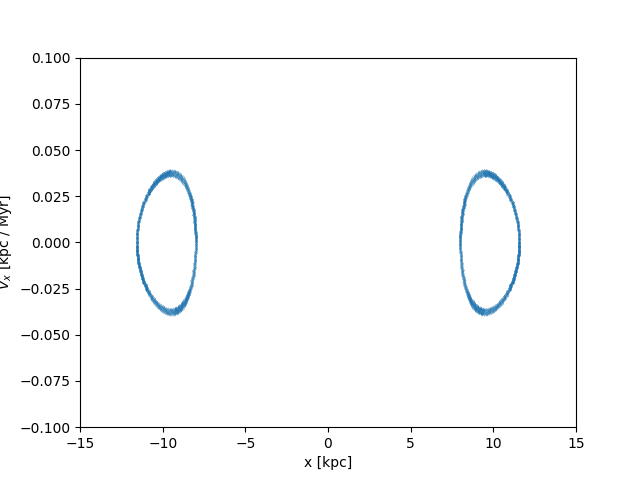

In [17]:
fig,ax = plt.subplots(1,1)
x,y = poincare_slice(oldgalpot,ics_closed,t_final=1e5*u.Myr)
ax.scatter(x,y,s=1e-2)
ax.set_xlabel(f"x [{x.unit}]")
ax.set_ylabel(f"$V_x$ [{y.unit}]")
ax.set_xlim(-15,15)
ax.set_ylim(-0.1,0.1)

(-0.5, 0.5)

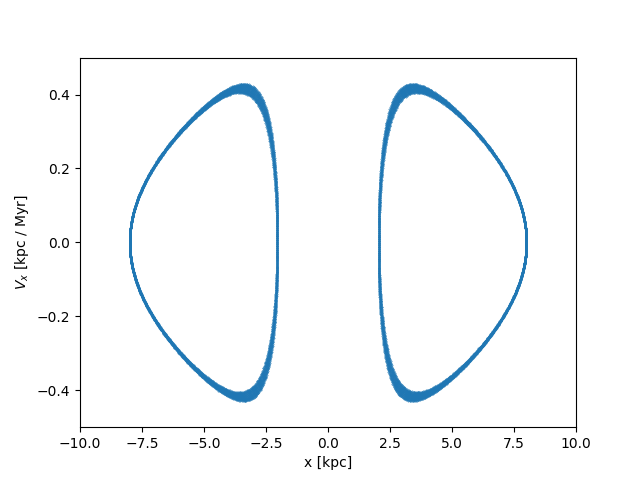

In [18]:
fig,ax = plt.subplots(1,1)
x,y = poincare_slice(newgalpot,ics_closed,t_final=1e5*u.Myr)
ax.scatter(x,y,s=.1)
ax.set_xlabel(f"x [{x.unit}]")
ax.set_ylabel(f"$V_x$ [{y.unit}]")
ax.set_xlim(-10,10)
ax.set_ylim(-0.5,0.5)

### Superficies de poincare en cada potencial progresivo

In [ ]:
# desde aqui solo utilizo el potencial nuevo
# Se representan

### Cortes de las superficies de poincare en cada potencial progresivo

## 2.1) Discusion
Como es apreciable al realizar las superficies de poincare

# 3) Analisis repeticion
Realizando evolucion de parametros temporalmente y superficies de poincare para:
- Orbita circular en potencial DM_Halo y Miyamoto-Nagai
- Orbita anterior levemente perturbada

In [19]:
circpot = gp.CCompositePotential()
circpot["halo"] = newgalpot["halo"]
circpot["disk"] = newgalpot["disk"]

r = [8,0,0] * u.kpc

V_circ = circpot.circular_velocity(r)
V_circ = V_circ[0]
V_circ = V_circ.value

v = [0, V_circ, 0] * u.km/u.s
circular_ics = gd.PhaseSpacePosition(pos=r,vel=v)

<function matplotlib.pyplot.show(block=None)>

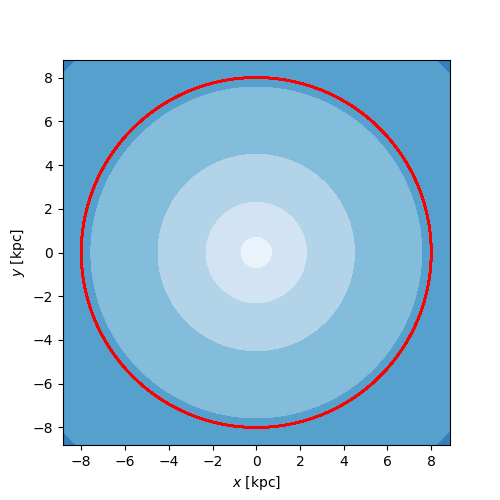

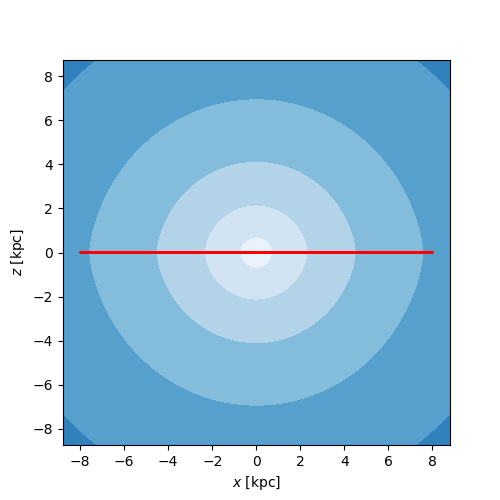

In [20]:
orbit = gp.Hamiltonian(circpot).integrate_orbit(circular_ics, dt=0.4, n_steps=1e4)
grid = np.linspace(-30,30,1000)

fig,ax = plt.subplots(1,1,figsize=(5,5))
orbit.plot(components=['x','y'], color='red', axes=ax)
circpot.plot_contours(grid=(grid,grid,0), ax=ax)
plt.show

fig,ax = plt.subplots(1,1,figsize=(5,5))
orbit.plot(components=['x','z'], color='red', axes=ax)
circpot.plot_contours(grid=(grid,0,grid), ax=ax)
plt.show

(-0.1, 0.1)

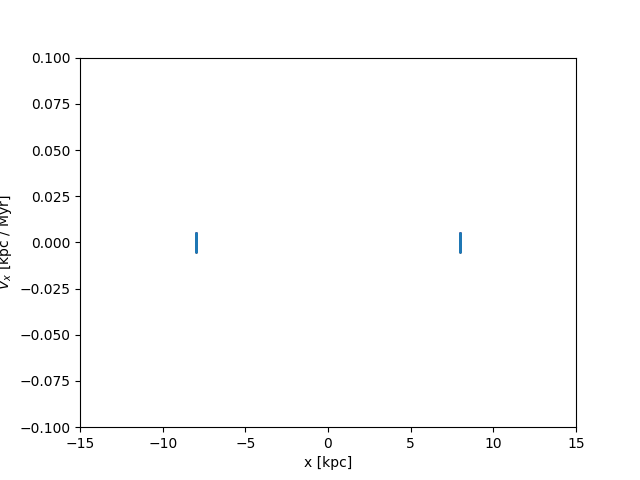

In [21]:
fig,ax = plt.subplots(1,1)
x,y = poincare_slice(circpot,circular_ics,t_final=1e5*u.Myr)
ax.scatter(x,y,s=1e-2)
ax.set_xlabel(f"x [{x.unit}]")
ax.set_ylabel(f"$V_x$ [{y.unit}]")
ax.set_xlim(-15,15)
ax.set_ylim(-0.1,0.1)

[401.31985689] km / s


<function matplotlib.pyplot.show(block=None)>

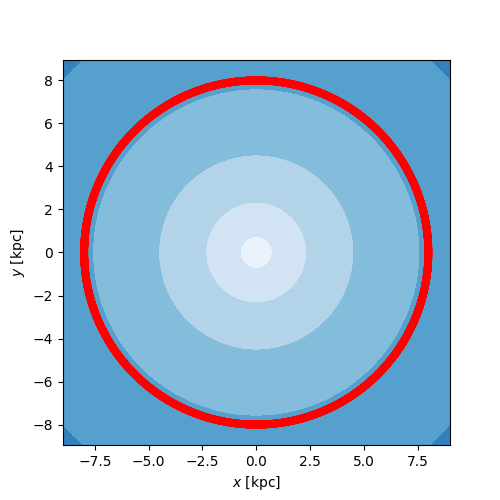

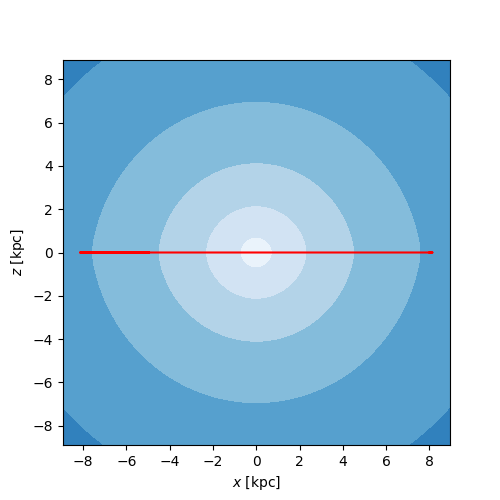

In [22]:
r = [8,0,0] * u.kpc

V_circ = circpot.circular_velocity(r)
print(V_circ)
V_circ = V_circ[0]
V_circ = V_circ.value

v = [10, V_circ, 0] * u.km/u.s
perturbed_ics = gd.PhaseSpacePosition(pos=r,vel=v)

perturbed_orbit = gp.Hamiltonian(circpot).integrate_orbit(perturbed_ics, dt=0.4, n_steps=1e4)
grid = np.linspace(-30,30,1000)

fig,ax = plt.subplots(1,1,figsize=(5,5))
perturbed_orbit.plot(components=['x','y'], color='red', axes=ax)
circpot.plot_contours(grid=(grid,grid,0), ax=ax)
plt.show

fig,ax = plt.subplots(1,1,figsize=(5,5))
perturbed_orbit.plot(components=['x','z'], color='red', axes=ax)
circpot.plot_contours(grid=(grid,0,grid), ax=ax)
plt.show

(-0.1, 0.1)

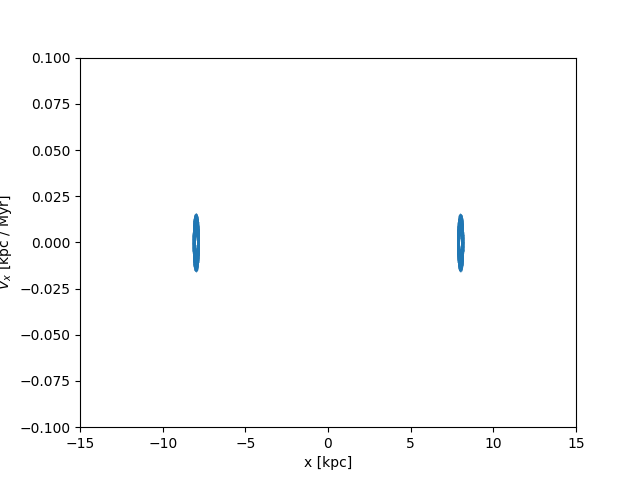

In [23]:
fig,ax = plt.subplots(1,1)
x,y = poincare_slice(circpot,perturbed_ics,t_final=1e5*u.Myr)
ax.scatter(x,y,s=1e-2)
ax.set_xlabel(f"x [{x.unit}]")
ax.set_ylabel(f"$V_x$ [{y.unit}]")
ax.set_xlim(-15,15)
ax.set_ylim(-0.1,0.1)

In [51]:
gp.Hamiltonian.integrate_orbit

Signature:     
gp.Hamiltonian.integrate_orbit(
    self,
    w0,
    Integrator=None,
    Integrator_kwargs={},
    cython_if_possible=True,
    store_all=True,
    **time_spec,
)
Call signature: gp.Hamiltonian.integrate_orbit(*args, **kwargs)
Type:           cython_function_or_method
String form:    <cyfunction Hamiltonian.integrate_orbit at 0x7fa7d723e670>
Docstring:     
Integrate an orbit in the current potential using the integrator class
provided. Uses same time specification as `Integrator.run()` -- see
the documentation for `gala.integrate` for more information.

Parameters
----------
w0 : `~gala.dynamics.PhaseSpacePosition`, array_like
    Initial conditions.
Integrator : `~gala.integrate.Integrator` (optional)
    Integrator class to use. By default, uses
    `~gala.integrate.LeapfrogIntegrator` if the frame is static and
    `~gala.integrate.DOPRI853Integrator` else.
Integrator_kwargs : dict (optional)
    Any extra keyword argumets to pass to the integrator class
    when 